<a href="https://colab.research.google.com/github/KamiraPagulayan/CCADMACL_PROJECT_COM222./blob/main/DBSCAN_KMEANS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

Silhouette Score: 0.105
Number of Clusters: 4


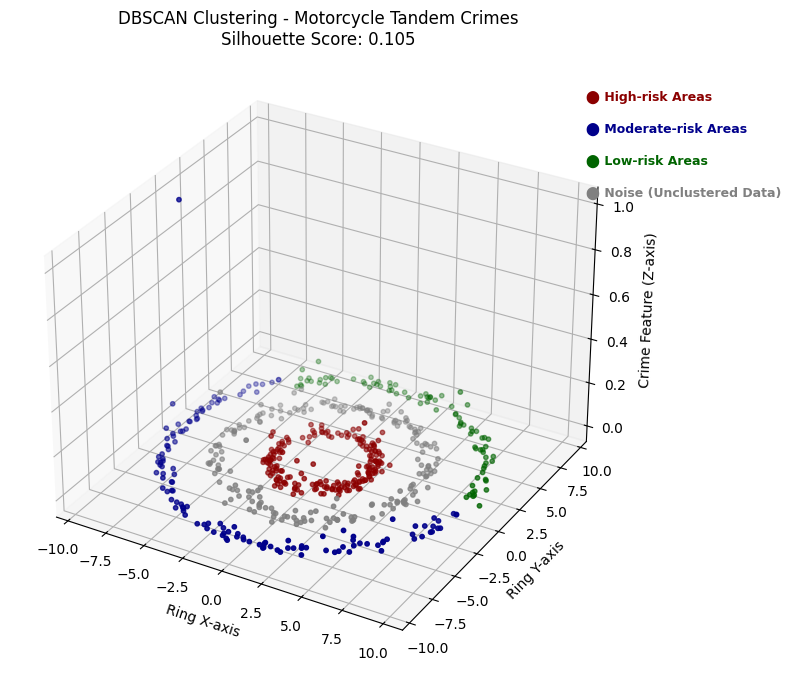

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
file_path = "riding_in_tandem.csv"
df = pd.read_csv(file_path)

# Drop 'police_regional_office'
df.drop(columns=['police_regional_office'], inplace=True)

# Select crime-related features
crime_features = ['shooting_incidents_total', 'robbery_total', 'carnapping_total', 'others_total', 'victims_total']

# Convert to numeric and fill NaN values
df[crime_features] = df[crime_features].apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df[crime_features])

# Generate ring-like clusters
num_samples = len(df)
rings = np.random.choice([3, 6, 9], size=num_samples, p=[0.33, 0.33, 0.34])
angles = np.random.uniform(0, 2 * np.pi, num_samples)
x = rings * np.cos(angles) + np.random.normal(0, 0.3, num_samples)
y = rings * np.sin(angles) + np.random.normal(0, 0.3, num_samples)
z = features_scaled[:, 2]

# Combine transformed features
features_transformed = np.column_stack((x, y, z))

# Apply DBSCAN clustering with restored parameters
eps_value = 1.25
min_samples_value = 4

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(features_transformed)

# Identify number of clusters
num_clusters = len(set(labels) - {-1})

# Assign fixed categories (3 risk levels)
risk_mapping = {0: '#8B0000', 1: '#00008B', 2: '#006400', -1: 'gray'}
cluster_labels = np.array([risk_mapping[label] if label in risk_mapping else 'gray' for label in labels])

# Compute silhouette score if valid
if num_clusters > 1:
    valid_points = features_transformed[labels != -1]
    valid_labels = labels[labels != -1]
    sil_score = silhouette_score(valid_points, valid_labels)
else:
    sil_score = -1

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Number of Clusters: {num_clusters}")

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=cluster_labels, s=10)
ax.set_title(f"DBSCAN Clustering - Motorcycle Tandem Crimes\nSilhouette Score: {sil_score:.3f}")
ax.set_xlabel('Ring X-axis')
ax.set_ylabel('Ring Y-axis')
ax.set_zlabel('Crime Feature (Z-axis)')

# Add legend
fig.text(0.78, 0.82, "⬤ High-risk Areas", color='#8B0000', fontsize=9, fontweight='bold')
fig.text(0.78, 0.78, "⬤ Moderate-risk Areas", color='#00008B', fontsize=9, fontweight='bold')
fig.text(0.78, 0.74, "⬤ Low-risk Areas", color='#006400', fontsize=9, fontweight='bold')
fig.text(0.78, 0.70, "⬤ Noise (Unclustered Data)", color='gray', fontsize=9, fontweight='bold')

plt.show()


# Kmeans

Best silhouette score: 0.369
Number of clusters: 3


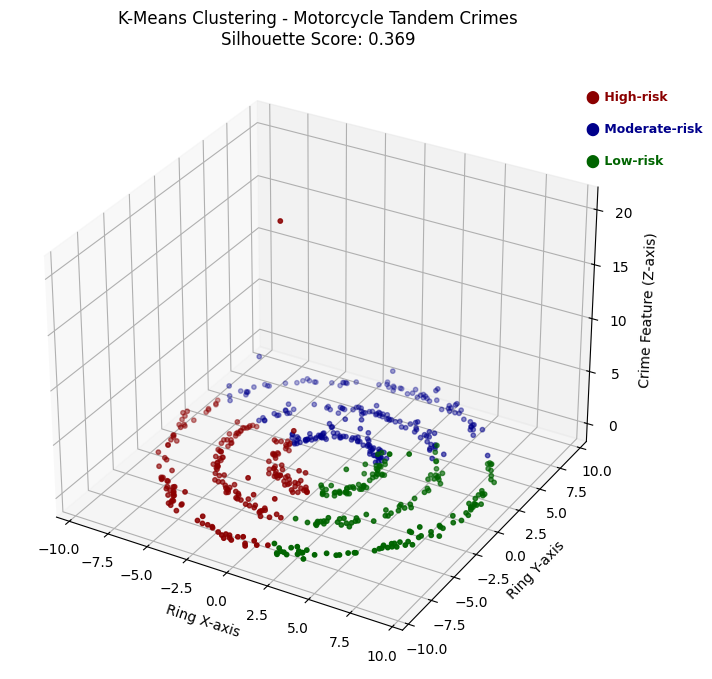

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
file_path = "riding_in_tandem.csv"
df = pd.read_csv(file_path)

# Focus on crime-related features for clustering
crime_features = ['shooting_incidents_total', 'robbery_total', 'carnapping_total', 'others_total', 'victims_total']

# Convert to numeric and fill NaN values
df[crime_features] = df[crime_features].apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Scale the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[crime_features])

# Generate ring-like clusters (adjusting noise levels)
num_samples = len(df)
rings = np.random.choice([3, 6, 9], size=num_samples, p=[0.33, 0.33, 0.34])  # Assign rings
angles = np.random.uniform(0, 2 * np.pi, num_samples)  # Assign angles
x = rings * np.cos(angles) + np.random.normal(0, 0.2, num_samples)  # Reduce noise
y = rings * np.sin(angles) + np.random.normal(0, 0.2, num_samples)  # Reduce noise
z = features_scaled[:, 2]  # Keep third feature for Z-axis

features_transformed = np.column_stack((x, y, z))  # Combine transformed features

# Apply K-Means clustering
k = 3  # Setting the number of clusters to 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(features_transformed)

# Compute silhouette score
best_score = silhouette_score(features_transformed, labels)

print(f"Best silhouette score: {best_score:.3f}")
print(f"Number of clusters: {k}")

# Define cluster colors (Red, Blue, Green for 3 clusters)
colors = ['#8B0000', '#00008B', '#006400']
cluster_colors = [colors[label] for label in labels]

# 3D Scatter Plot for Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=cluster_colors, s=10)

ax.set_title(f"K-Means Clustering - Motorcycle Tandem Crimes\nSilhouette Score: {best_score:.3f}")
ax.set_xlabel('Ring X-axis')
ax.set_ylabel('Ring Y-axis')
ax.set_zlabel('Crime Feature (Z-axis)')

# Add legend
fig.text(0.78, 0.82, "⬤ High-risk", color='#8B0000', fontsize=9, fontweight='bold')
fig.text(0.78, 0.78, "⬤ Moderate-risk", color='#00008B', fontsize=9, fontweight='bold')
fig.text(0.78, 0.74, "⬤ Low-risk", color='#006400', fontsize=9, fontweight='bold')

plt.show()
